In [1]:
import pandas as pd

In [2]:
df1= pd.read_csv('../data/traffic/2020_US_Region_Mobility_Report.csv')
df2= pd.read_csv('../data/traffic/2021_US_Region_Mobility_Report.csv')
df3= pd.read_csv('../data/traffic/2022_US_Region_Mobility_Report.csv')
print(df1.shape, df2.shape, df3.shape)

(812065, 15) (951960, 15) (747969, 15)


In [3]:
df1.columns

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'place_id', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [4]:
df= pd.concat([df1, df2, df3])
df.shape

(2511994, 15)

In [5]:
del df1, df2, df3

In [6]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2511994 entries, 0 to 747968
Data columns (total 15 columns):
 #   Column                                              Non-Null Count    Dtype  
---  ------                                              --------------    -----  
 0   country_region_code                                 2511994 non-null  object 
 1   country_region                                      2511994 non-null  object 
 2   sub_region_1                                        2511020 non-null  object 
 3   sub_region_2                                        2461346 non-null  object 
 4   metro_area                                          0 non-null        float64
 5   iso_3166_2_code                                     49674 non-null    object 
 6   census_fips_code                                    2460676 non-null  float64
 7   place_id                                            2511994 non-null  object 
 8   date                                                2

In [15]:
df.columns=['country_code', 'country', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'fips_code', 'place_id', 'date',
       'retail_n_recreation',
       'grocery_n_pharma',
       'parks',
       'transit_stations',
       'workplaces',
       'residential']

In [16]:
df.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,metro_area,fips_code,retail_n_recreation,grocery_n_pharma,parks,transit_stations,workplaces,residential
count,0.000,2460676.000,1629533.000,1458594.000,620063.000,960597.000,2467991.000,1491359.000
mean,nan,30358.176,-2.833,3.827,30.164,-5.028,-19.292,5.375
std,nan,15293.925,19.890,16.006,63.315,32.163,14.481,5.093
min,nan,1001.000,-100.000,-100.000,-96.000,-100.000,-100.000,-46.000
25%,nan,18107.000,-13.000,-5.000,-12.000,-27.000,-27.000,2.000
50%,nan,29113.000,-3.000,3.000,15.000,-6.000,-18.000,4.000
75%,nan,45053.000,8.000,12.000,58.000,12.000,-10.000,7.000
max,nan,56045.000,409.000,332.000,812.000,478.000,124.000,46.000


In [7]:
import missingno as mno
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [8]:
missing_values_table(df)

Your selected dataframe has 15 columns.
There are 11 columns that have missing values.


,Missing Values,% of Total Values
metro_area,2511994,100.0
iso_3166_2_code,2462320,98.0
parks_percent_change_from_baseline,1891931,75.3
transit_stations_percent_change_from_baseline,1551397,61.8
grocery_and_pharmacy_percent_change_from_baseline,1053400,41.9
residential_percent_change_from_baseline,1020635,40.6
retail_and_recreation_percent_change_from_baseline,882461,35.1
census_fips_code,51318,2.0
sub_region_2,50648,2.0
workplaces_percent_change_from_baseline,44003,1.8


In [20]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2511994 entries, 0 to 747968
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   country_code         2511994 non-null  object 
 1   country              2511994 non-null  object 
 2   sub_region_1         2511020 non-null  object 
 3   sub_region_2         2461346 non-null  object 
 4   metro_area           0 non-null        float64
 5   iso_3166_2_code      49674 non-null    object 
 6   fips_code            2460676 non-null  float64
 7   place_id             2511994 non-null  object 
 8   date                 2511994 non-null  object 
 9   retail_n_recreation  1629533 non-null  float64
 10  grocery_n_pharma     1458594 non-null  float64
 11  parks                620063 non-null   float64
 12  transit_stations     960597 non-null   float64
 13  workplaces           2467991 non-null  float64
 14  residential          1491359 non-null  float64
dtyp

In [18]:
df.columns

Index(['country_code', 'country', 'sub_region_1', 'sub_region_2', 'metro_area',
       'iso_3166_2_code', 'fips_code', 'place_id', 'date',
       'retail_n_recreation', 'grocery_n_pharma', 'parks', 'transit_stations',
       'workplaces', 'residential'],
      dtype='object')

In [21]:
# df['sub_region_1'].value_counts()

In [22]:
df= df[df['sub_region_1']=='New York']
df.reset_index(inplace=True, drop=True)
df.shape

(60126, 15)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60126 entries, 0 to 60125
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country_code         60126 non-null  object 
 1   country              60126 non-null  object 
 2   sub_region_1         60126 non-null  object 
 3   sub_region_2         59152 non-null  object 
 4   metro_area           0 non-null      float64
 5   iso_3166_2_code      974 non-null    object 
 6   fips_code            59152 non-null  float64
 7   place_id             60126 non-null  object 
 8   date                 60126 non-null  object 
 9   retail_n_recreation  56099 non-null  float64
 10  grocery_n_pharma     53476 non-null  float64
 11  parks                21197 non-null  float64
 12  transit_stations     30450 non-null  float64
 13  workplaces           59892 non-null  float64
 14  residential          54671 non-null  float64
dtypes: float64(8), object(7)
memory usag

In [24]:
df['sub_region_2'].value_counts()

Albany County       974
Monroe County       974
New York County     974
Oneida County       974
Onondaga County     974
                   ... 
Lewis County        949
Schuyler County     949
Schoharie County    949
Essex County        949
Yates County        949
Name: sub_region_2, Length: 61, dtype: int64

In [25]:
dff= df[df['sub_region_2'].isna()]
dff.shape

(974, 15)

In [26]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 0 to 42557
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country_code         974 non-null    object 
 1   country              974 non-null    object 
 2   sub_region_1         974 non-null    object 
 3   sub_region_2         0 non-null      object 
 4   metro_area           0 non-null      float64
 5   iso_3166_2_code      974 non-null    object 
 6   fips_code            0 non-null      float64
 7   place_id             974 non-null    object 
 8   date                 974 non-null    object 
 9   retail_n_recreation  974 non-null    float64
 10  grocery_n_pharma     974 non-null    float64
 11  parks                974 non-null    float64
 12  transit_stations     974 non-null    float64
 13  workplaces           974 non-null    float64
 14  residential          974 non-null    float64
dtypes: float64(8), object(7)
memory usage:

In [27]:
dff.columns

Index(['country_code', 'country', 'sub_region_1', 'sub_region_2', 'metro_area',
       'iso_3166_2_code', 'fips_code', 'place_id', 'date',
       'retail_n_recreation', 'grocery_n_pharma', 'parks', 'transit_stations',
       'workplaces', 'residential'],
      dtype='object')

In [28]:
dff.drop(columns=['country_code', 'country', 'sub_region_1', 'sub_region_2', 'metro_area',
       'iso_3166_2_code', 'fips_code', 'place_id', ], inplace=True)

dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 0 to 42557
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 974 non-null    object 
 1   retail_n_recreation  974 non-null    float64
 2   grocery_n_pharma     974 non-null    float64
 3   parks                974 non-null    float64
 4   transit_stations     974 non-null    float64
 5   workplaces           974 non-null    float64
 6   residential          974 non-null    float64
dtypes: float64(6), object(1)
memory usage: 60.9+ KB


C:\Users\31405.ISBDOMAIN1\AppData\Local\Temp\12\ipykernel_37868\2658718371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff.drop(columns=['country_code', 'country', 'sub_region_1', 'sub_region_2', 'metro_area',


In [29]:
dff.head()

,date,retail_n_recreation,grocery_n_pharma,parks,transit_stations,workplaces,residential
0,2020-02-15,3.0,-4.0,-2.0,-4.0,1.0,0.0
1,2020-02-16,7.0,-3.0,13.0,0.0,0.0,-1.0
2,2020-02-17,7.0,-2.0,23.0,-22.0,-37.0,9.0
3,2020-02-18,-2.0,-5.0,-4.0,-5.0,-10.0,3.0
4,2020-02-19,3.0,-2.0,11.0,-3.0,-9.0,2.0


In [30]:
dff['date']= dff['date'].astype('datetime64[ns]')
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 0 to 42557
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 974 non-null    datetime64[ns]
 1   retail_n_recreation  974 non-null    float64       
 2   grocery_n_pharma     974 non-null    float64       
 3   parks                974 non-null    float64       
 4   transit_stations     974 non-null    float64       
 5   workplaces           974 non-null    float64       
 6   residential          974 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 60.9 KB


C:\Users\31405.ISBDOMAIN1\AppData\Local\Temp\12\ipykernel_37868\3799486668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['date']= dff['date'].astype('datetime64[ns]')


In [31]:
dff.head()

,date,retail_n_recreation,grocery_n_pharma,parks,transit_stations,workplaces,residential
0,2020-02-15,3.0,-4.0,-2.0,-4.0,1.0,0.0
1,2020-02-16,7.0,-3.0,13.0,0.0,0.0,-1.0
2,2020-02-17,7.0,-2.0,23.0,-22.0,-37.0,9.0
3,2020-02-18,-2.0,-5.0,-4.0,-5.0,-10.0,3.0
4,2020-02-19,3.0,-2.0,11.0,-3.0,-9.0,2.0


In [32]:
dff.describe()

,retail_n_recreation,grocery_n_pharma,parks,transit_stations,workplaces,residential
count,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000
mean,-21.735113,-6.412731,23.040041,-37.218686,-30.779261,8.240246
std,13.933687,8.961037,43.533893,13.498750,13.707094,6.331197
min,-83.000000,-63.000000,-64.000000,-76.000000,-81.000000,-4.000000
25%,-27.000000,-10.000000,-12.000000,-46.000000,-38.000000,4.000000
50%,-19.000000,-6.000000,20.000000,-36.000000,-33.000000,7.000000
75%,-13.000000,-2.000000,52.000000,-29.000000,-19.000000,12.000000
max,10.000000,31.000000,180.000000,3.000000,6.000000,32.000000


In [33]:
dff['date'].max()- dff['date'].min()

Timedelta('973 days 00:00:00')

In [34]:
dff.reset_index(inplace=True, drop=True)

In [35]:
dff.isnull().sum()

date                   0
retail_n_recreation    0
grocery_n_pharma       0
parks                  0
transit_stations       0
workplaces             0
residential            0
dtype: int64

In [36]:
del df

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

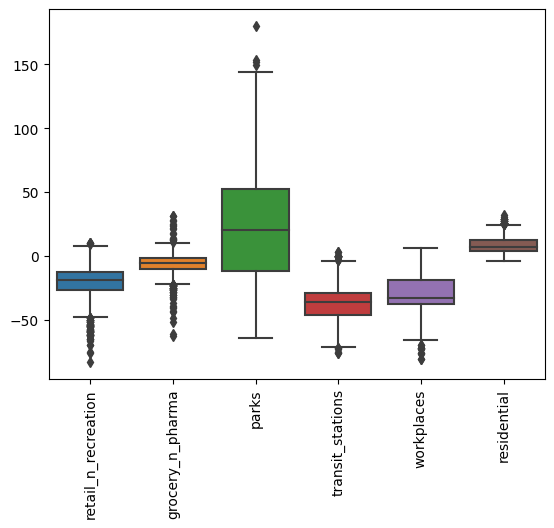

In [38]:
sns.boxplot(data=dff)
plt.xticks(rotation=90)
plt.show()

In [29]:
dff.corr()

,retail_traffic,grocery_pharma_traffic,parks_traffic,transit_traffic,workplace_traffic,residential_traffic
retail_traffic,1.000000,0.718480,0.475054,0.879877,0.589802,-0.792205
grocery_pharma_traffic,0.718480,1.000000,0.417611,0.527330,0.291722,-0.420117
parks_traffic,0.475054,0.417611,1.000000,0.460454,0.282012,-0.561591
transit_traffic,0.879877,0.527330,0.460454,1.000000,0.801398,-0.903435
workplace_traffic,0.589802,0.291722,0.282012,0.801398,1.000000,-0.860959
residential_traffic,-0.792205,-0.420117,-0.561591,-0.903435,-0.860959,1.000000


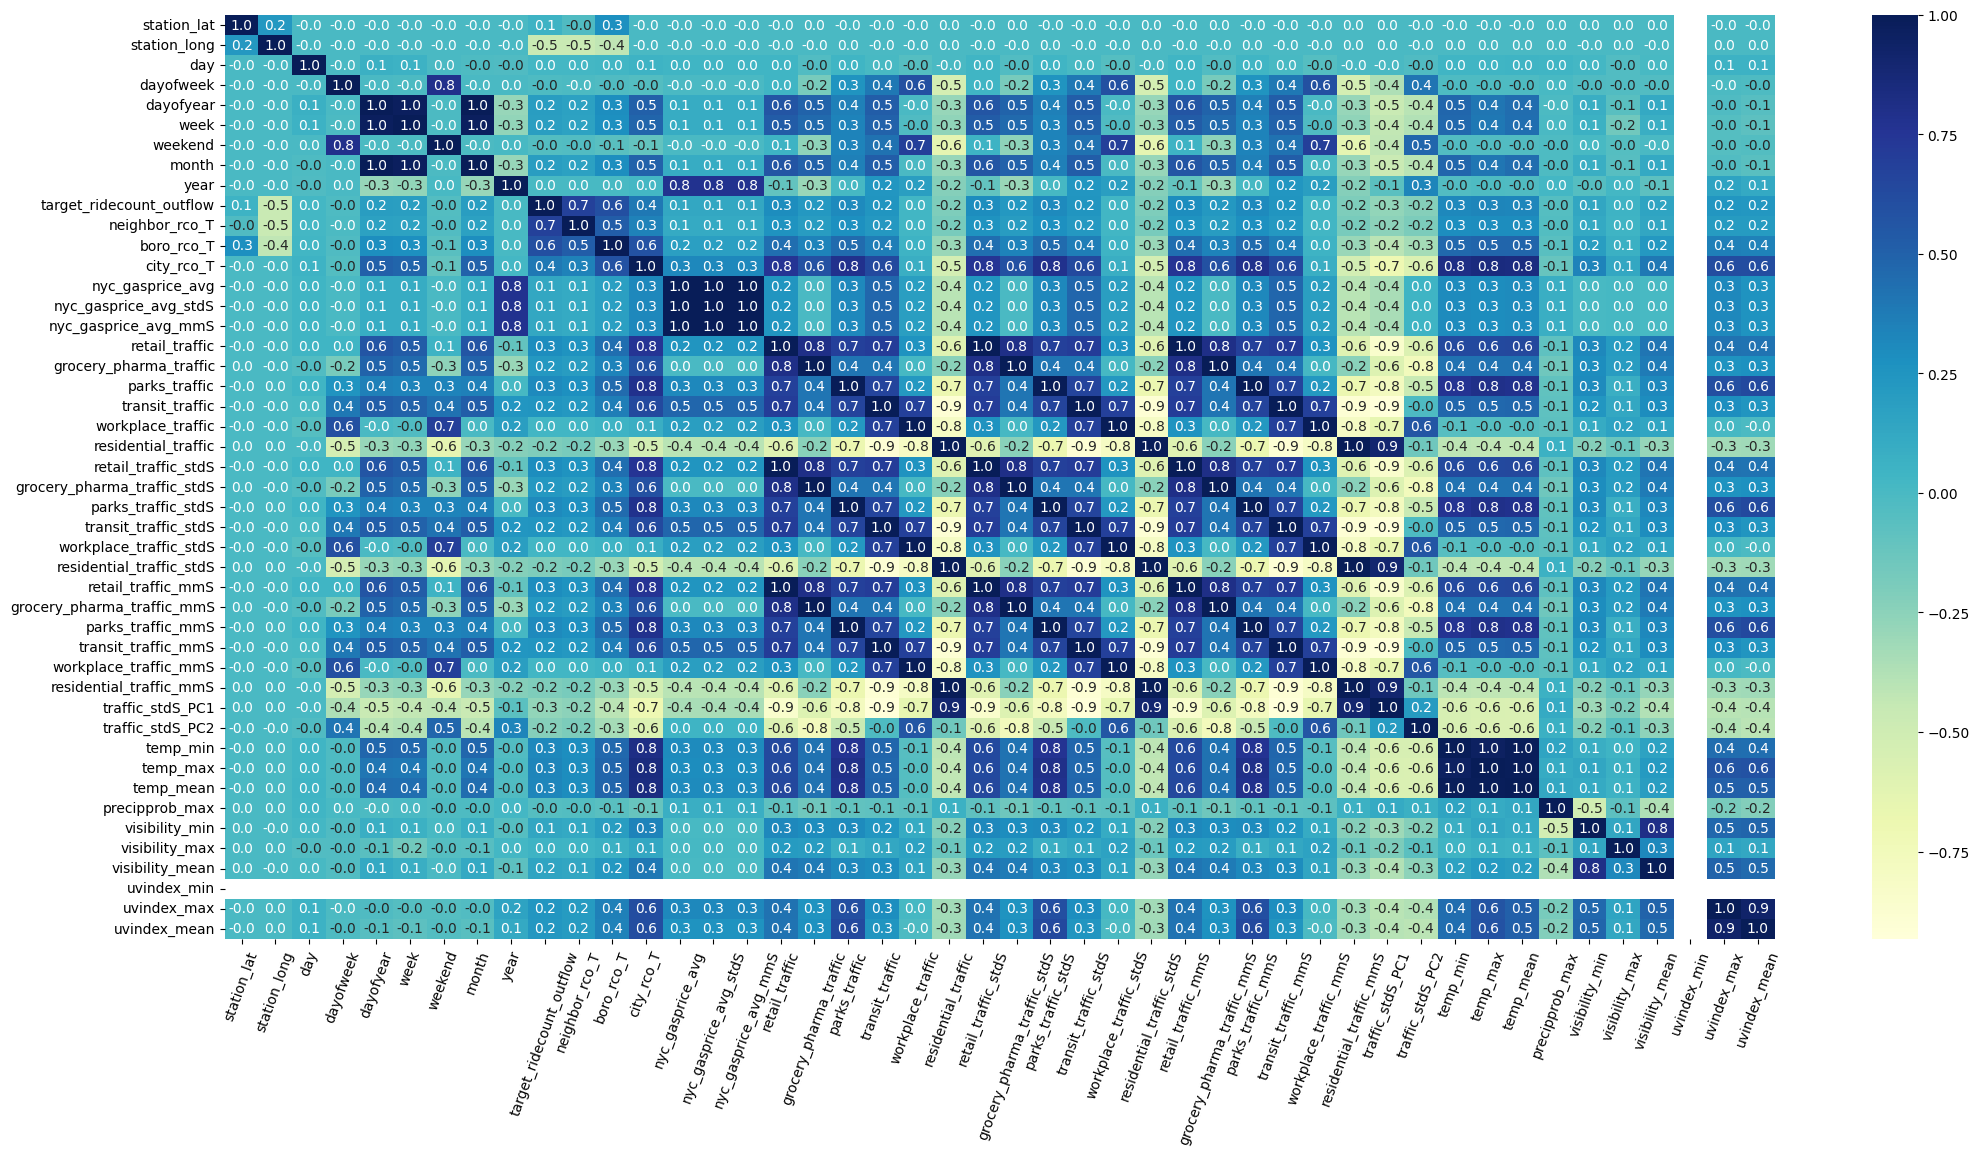

In [54]:
fig, ax = plt.subplots(figsize=(25,12))

hm= sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, fmt='.1f')
hm.set_xticklabels(hm.get_xticklabels(), rotation=70)
plt.show()

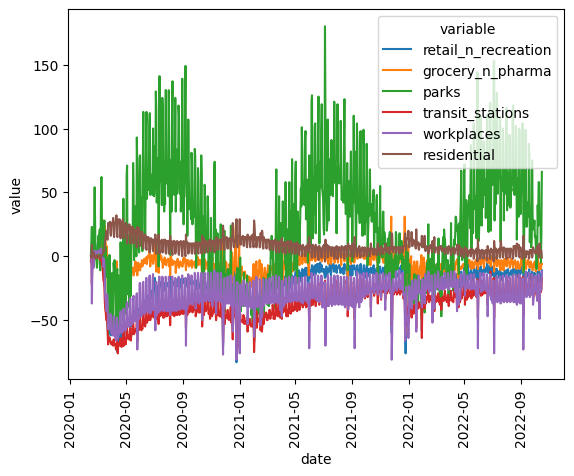

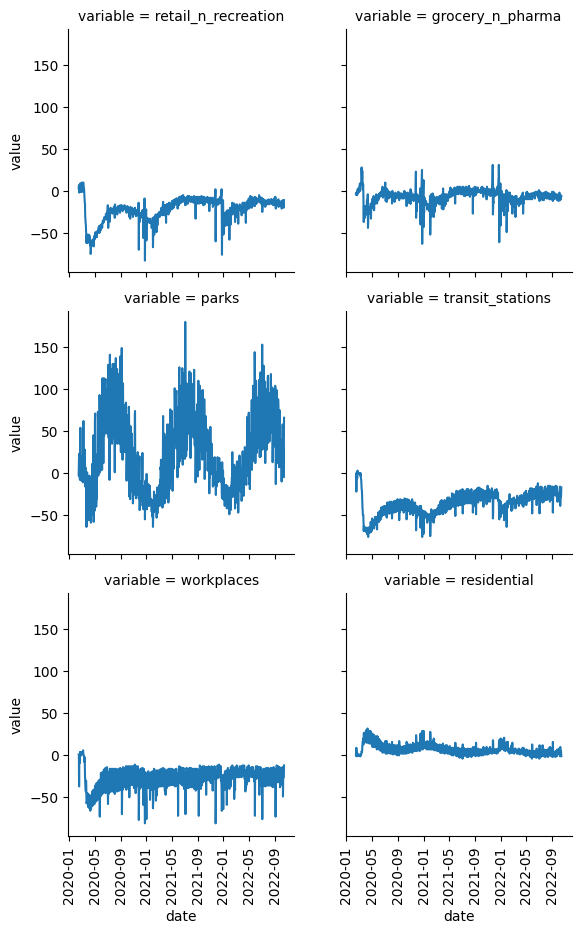

In [49]:
# convert dataframe from wide format to long format
df_melt = pd.melt(dff, id_vars=['date'], var_name='variable', value_name='value')

# plot all the variables on the same chart
sns.lineplot(x='date', y='value', hue='variable', data=df_melt)
# display the chart
plt.xticks(rotation=90)
plt.show()

g = sns.FacetGrid(data=df_melt, col="variable", col_wrap=2)
g.map(sns.lineplot, "date", "value")
g.set_xticklabels(rotation=90)
plt.show()

In [41]:
dff.columns

Index(['date', 'retail_n_recreation', 'grocery_n_pharma', 'parks',
       'transit_stations', 'workplaces', 'residential'],
      dtype='object')

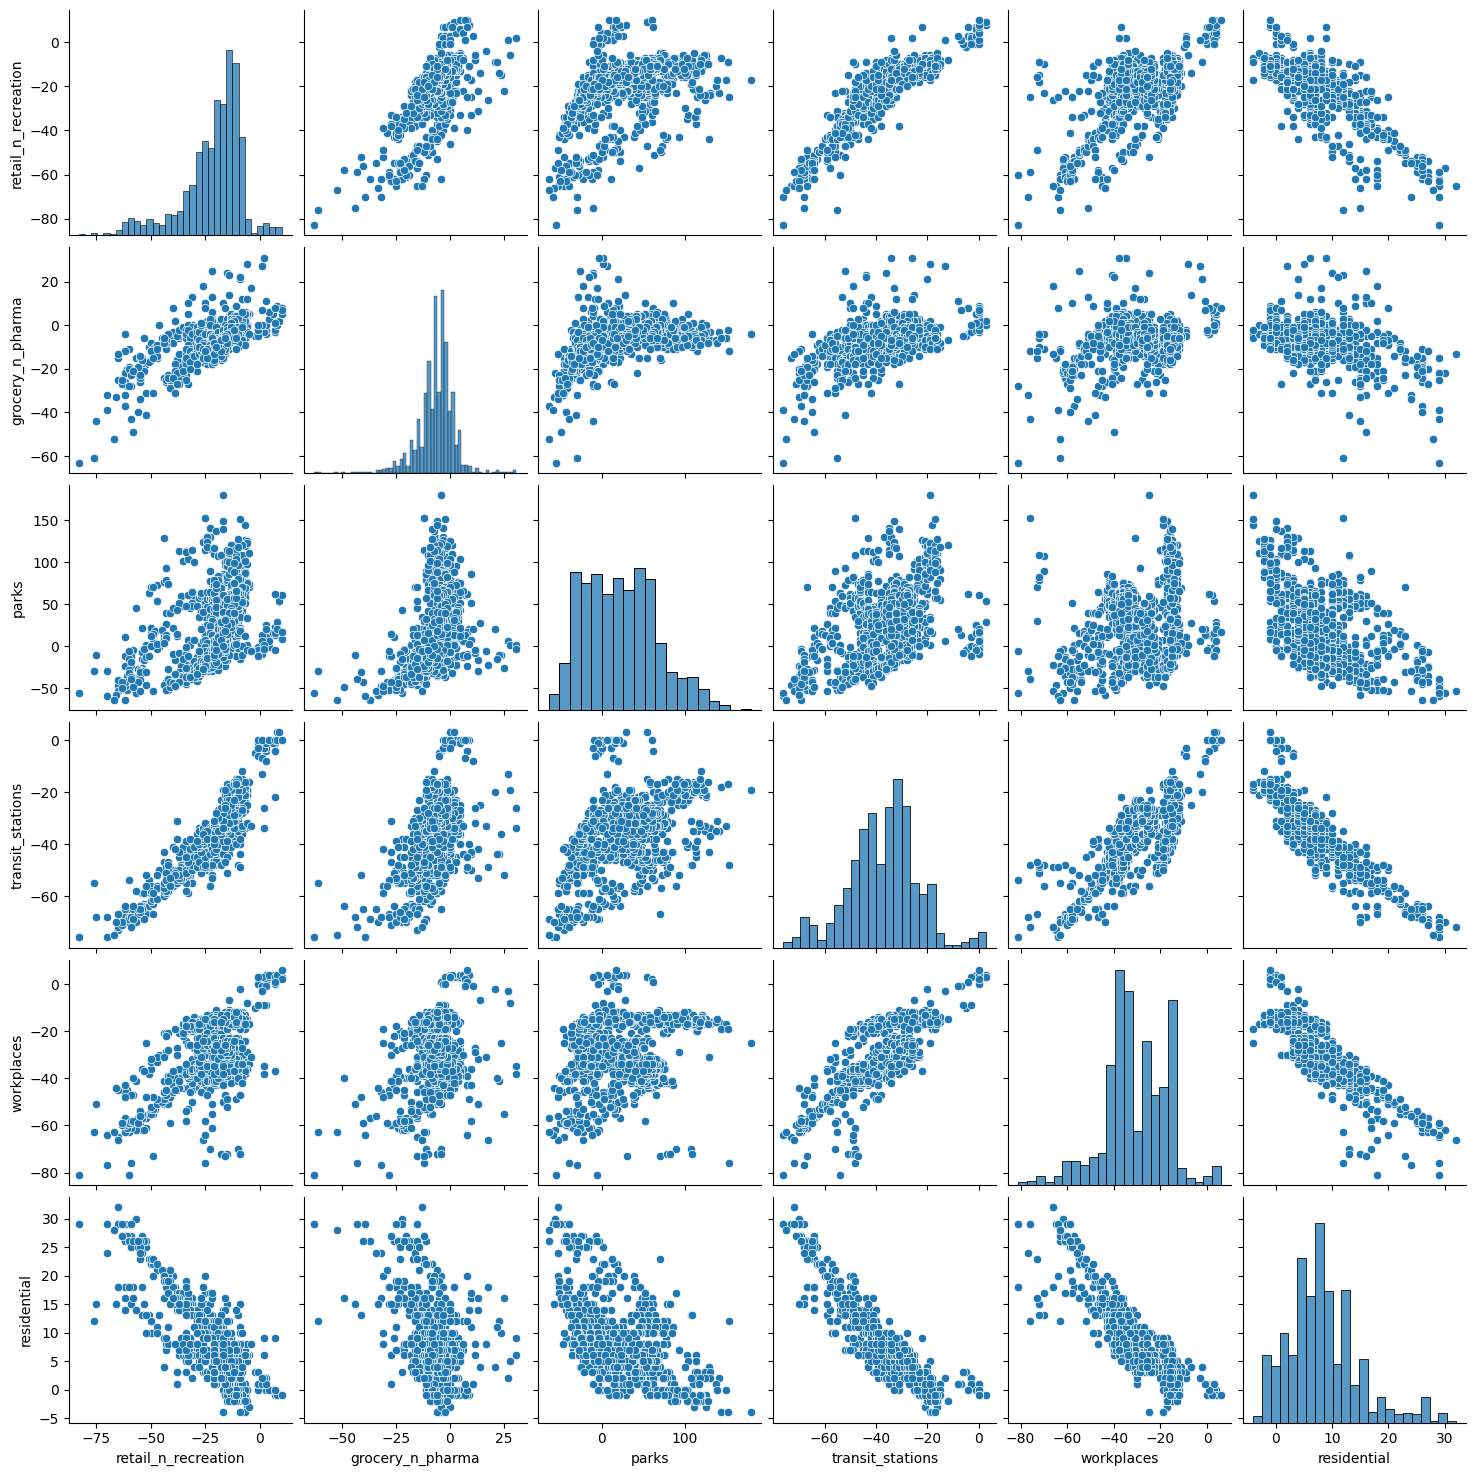

In [42]:
# create scatter plot with multiple dimensions
sns.pairplot(data=dff, vars=['retail_n_recreation', 'grocery_n_pharma', 'parks',
       'transit_stations', 'workplaces', 'residential'])

# show the plot
plt.show()

In [44]:
dff

,date,retail_n_recreation,grocery_n_pharma,parks,transit_stations,workplaces,residential
0,2020-02-15,3.0,-4.0,-2.0,-4.0,1.0,0.0
1,2020-02-16,7.0,-3.0,13.0,0.0,0.0,-1.0
2,2020-02-17,7.0,-2.0,23.0,-22.0,-37.0,9.0
3,2020-02-18,-2.0,-5.0,-4.0,-5.0,-10.0,3.0
4,2020-02-19,3.0,-2.0,11.0,-3.0,-9.0,2.0
...,...,...,...,...,...,...,...
969,2022-10-11,-18.0,-7.0,29.0,-26.0,-28.0,4.0
970,2022-10-12,-16.0,-5.0,31.0,-25.0,-26.0,4.0
971,2022-10-13,-20.0,-10.0,-5.0,-28.0,-26.0,5.0
972,2022-10-14,-16.0,-6.0,18.0,-26.0,-26.0,4.0


In [46]:
import os
os.getcwd()

'd:\\OneDrive - Indian School of Business\\Desktop\\data270_spring23_group2\\data collection'

In [47]:
os.chdir(r"D:\OneDrive - Indian School of Business\Desktop\data270_spring23_group2\data\final")

In [48]:
dff.to_csv('cleaned_traffic_index.csv', index=False)

In [35]:
dff.set_index('date', inplace=True)
dff

,retail_traffic,grocery_pharma_traffic,parks_traffic,transit_traffic,workplace_traffic,residential_traffic
date,,,,,,
2020-02-15,3.0,-4.0,-2.0,-4.0,1.0,0.0
2020-02-16,7.0,-3.0,13.0,0.0,0.0,-1.0
2020-02-17,7.0,-2.0,23.0,-22.0,-37.0,9.0
2020-02-18,-2.0,-5.0,-4.0,-5.0,-10.0,3.0
2020-02-19,3.0,-2.0,11.0,-3.0,-9.0,2.0
...,...,...,...,...,...,...
2022-10-11,-18.0,-7.0,29.0,-26.0,-28.0,4.0
2022-10-12,-16.0,-5.0,31.0,-25.0,-26.0,4.0
2022-10-13,-20.0,-10.0,-5.0,-28.0,-26.0,5.0


In [36]:
dff.reset_index(inplace=True)
dff

,date,retail_traffic,grocery_pharma_traffic,parks_traffic,transit_traffic,workplace_traffic,residential_traffic
0,2020-02-15,3.0,-4.0,-2.0,-4.0,1.0,0.0
1,2020-02-16,7.0,-3.0,13.0,0.0,0.0,-1.0
2,2020-02-17,7.0,-2.0,23.0,-22.0,-37.0,9.0
3,2020-02-18,-2.0,-5.0,-4.0,-5.0,-10.0,3.0
4,2020-02-19,3.0,-2.0,11.0,-3.0,-9.0,2.0
...,...,...,...,...,...,...,...
969,2022-10-11,-18.0,-7.0,29.0,-26.0,-28.0,4.0
970,2022-10-12,-16.0,-5.0,31.0,-25.0,-26.0,4.0
971,2022-10-13,-20.0,-10.0,-5.0,-28.0,-26.0,5.0
972,2022-10-14,-16.0,-6.0,18.0,-26.0,-26.0,4.0


In [50]:
df= pd.read_csv("cleaned_nontransformed.csv", index_col=0)

In [37]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize scaler
scaler = StandardScaler()

# select the traffic columns to be normalized
traffic_cols = ['retail_traffic', 'grocery_pharma_traffic', 'parks_traffic', 'transit_traffic', 'workplace_traffic', 'residential_traffic']
traffic_colso = ['retail_traffic_stdS', 'grocery_pharma_traffic_stdS', 'parks_traffic_stdS', 'transit_traffic_stdS', 'workplace_traffic_stdS', 'residential_traffic_stdS']

# normalize the traffic columns
dff[traffic_colso] = scaler.fit_transform(dff[traffic_cols])
dff

,date,retail_traffic,grocery_pharma_traffic,parks_traffic,transit_traffic,workplace_traffic,residential_traffic,retail_traffic_stdS,grocery_pharma_traffic_stdS,parks_traffic_stdS,transit_traffic_stdS,workplace_traffic_stdS,residential_traffic_stdS
0,2020-02-15,3.0,-4.0,-2.0,-4.0,1.0,0.0,1.776114,0.269385,-0.575480,2.462135,2.319645,-1.302199
1,2020-02-16,7.0,-3.0,13.0,0.0,0.0,-1.0,2.063336,0.381037,-0.230744,2.758611,2.246652,-1.460228
2,2020-02-17,7.0,-2.0,23.0,-22.0,-37.0,9.0,2.063336,0.492688,-0.000920,1.127994,-0.454067,0.120063
3,2020-02-18,-2.0,-5.0,-4.0,-5.0,-10.0,3.0,1.417087,0.157734,-0.621445,2.388016,1.516728,-0.828112
4,2020-02-19,3.0,-2.0,11.0,-3.0,-9.0,2.0,1.776114,0.492688,-0.276709,2.536254,1.589721,-0.986141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,2022-10-11,-18.0,-7.0,29.0,-26.0,-28.0,4.0,0.268201,-0.065569,0.136974,0.831518,0.202865,-0.670083
970,2022-10-12,-16.0,-5.0,31.0,-25.0,-26.0,4.0,0.411812,0.157734,0.182939,0.905637,0.348850,-0.670083
971,2022-10-13,-20.0,-10.0,-5.0,-28.0,-26.0,5.0,0.124590,-0.400524,-0.644428,0.683280,0.348850,-0.512053
972,2022-10-14,-16.0,-6.0,18.0,-26.0,-26.0,4.0,0.411812,0.046082,-0.115832,0.831518,0.348850,-0.670083


In [38]:
# Initialize scaler
scaler = MinMaxScaler()

# select the traffic columns to be normalized
traffic_cols = ['retail_traffic', 'grocery_pharma_traffic', 'parks_traffic', 'transit_traffic', 'workplace_traffic', 'residential_traffic']
traffic_colsm = ['retail_traffic_mmS', 'grocery_pharma_traffic_mmS', 'parks_traffic_mmS', 'transit_traffic_mmS', 'workplace_traffic_mmS', 'residential_traffic_mmS']

# normalize the traffic columns
dff[traffic_colsm] = scaler.fit_transform(dff[traffic_cols])
dff

,date,retail_traffic,grocery_pharma_traffic,parks_traffic,transit_traffic,workplace_traffic,residential_traffic,retail_traffic_stdS,grocery_pharma_traffic_stdS,parks_traffic_stdS,transit_traffic_stdS,workplace_traffic_stdS,residential_traffic_stdS,retail_traffic_mmS,grocery_pharma_traffic_mmS,parks_traffic_mmS,transit_traffic_mmS,workplace_traffic_mmS,residential_traffic_mmS
0,2020-02-15,3.0,-4.0,-2.0,-4.0,1.0,0.0,1.776114,0.269385,-0.575480,2.462135,2.319645,-1.302199,0.924731,0.627660,0.254098,0.911392,0.942529,0.111111
1,2020-02-16,7.0,-3.0,13.0,0.0,0.0,-1.0,2.063336,0.381037,-0.230744,2.758611,2.246652,-1.460228,0.967742,0.638298,0.315574,0.962025,0.931034,0.083333
2,2020-02-17,7.0,-2.0,23.0,-22.0,-37.0,9.0,2.063336,0.492688,-0.000920,1.127994,-0.454067,0.120063,0.967742,0.648936,0.356557,0.683544,0.505747,0.361111
3,2020-02-18,-2.0,-5.0,-4.0,-5.0,-10.0,3.0,1.417087,0.157734,-0.621445,2.388016,1.516728,-0.828112,0.870968,0.617021,0.245902,0.898734,0.816092,0.194444
4,2020-02-19,3.0,-2.0,11.0,-3.0,-9.0,2.0,1.776114,0.492688,-0.276709,2.536254,1.589721,-0.986141,0.924731,0.648936,0.307377,0.924051,0.827586,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,2022-10-11,-18.0,-7.0,29.0,-26.0,-28.0,4.0,0.268201,-0.065569,0.136974,0.831518,0.202865,-0.670083,0.698925,0.595745,0.381148,0.632911,0.609195,0.222222
970,2022-10-12,-16.0,-5.0,31.0,-25.0,-26.0,4.0,0.411812,0.157734,0.182939,0.905637,0.348850,-0.670083,0.720430,0.617021,0.389344,0.645570,0.632184,0.222222
971,2022-10-13,-20.0,-10.0,-5.0,-28.0,-26.0,5.0,0.124590,-0.400524,-0.644428,0.683280,0.348850,-0.512053,0.677419,0.563830,0.241803,0.607595,0.632184,0.250000
972,2022-10-14,-16.0,-6.0,18.0,-26.0,-26.0,4.0,0.411812,0.046082,-0.115832,0.831518,0.348850,-0.670083,0.720430,0.606383,0.336066,0.632911,0.632184,0.222222


In [39]:
dff.describe()

,retail_traffic,grocery_pharma_traffic,parks_traffic,transit_traffic,workplace_traffic,residential_traffic,retail_traffic_stdS,grocery_pharma_traffic_stdS,parks_traffic_stdS,transit_traffic_stdS,workplace_traffic_stdS,residential_traffic_stdS,retail_traffic_mmS,grocery_pharma_traffic_mmS,parks_traffic_mmS,transit_traffic_mmS,workplace_traffic_mmS,residential_traffic_mmS
count,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,9.740000e+02,9.740000e+02,9.740000e+02,9.740000e+02,9.740000e+02,9.740000e+02,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000
mean,-21.735113,-6.412731,23.040041,-37.218686,-30.779261,8.240246,-2.073632e-15,-5.115119e-18,7.021534e-17,-9.392441e-16,-2.863327e-16,-5.162195e-15,0.658762,0.601992,0.356721,0.490903,0.577250,0.340007
std,13.933687,8.961037,43.533893,13.498750,13.707094,6.331197,1.000514e+00,1.000514e+00,1.000514e+00,1.000514e+00,1.000514e+00,1.000514e+00,0.149825,0.095330,0.178418,0.170870,0.157553,0.175867
min,-83.000000,-63.000000,-64.000000,-76.000000,-81.000000,-4.000000,-4.399149e+00,-6.318057e+00,-2.000390e+00,-2.874432e+00,-3.665733e+00,-1.934316e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-27.000000,-10.000000,-12.000000,-46.000000,-38.000000,4.000000,-3.780472e-01,-4.005242e-01,-8.053046e-01,-6.508621e-01,-5.270591e-01,-6.700826e-01,0.602151,0.563830,0.213115,0.379747,0.494253,0.222222
50%,-19.000000,-6.000000,20.000000,-36.000000,-33.000000,7.000000,1.963958e-01,4.608206e-02,-6.986747e-02,9.032776e-02,-1.620971e-01,-1.959951e-01,0.688172,0.606383,0.344262,0.506329,0.551724,0.305556
75%,-13.000000,-2.000000,52.000000,-29.000000,-19.000000,12.000000,6.272281e-01,4.926883e-01,6.655696e-01,6.091607e-01,8.597966e-01,5.941507e-01,0.752688,0.648936,0.475410,0.594937,0.712644,0.444444
max,10.000000,31.000000,180.000000,3.000000,6.000000,32.000000,2.278752e+00,4.177190e+00,3.607318e+00,2.980968e+00,2.684607e+00,3.754734e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


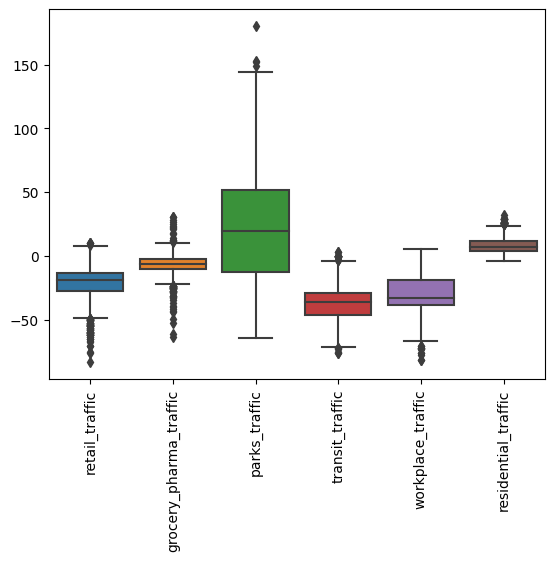

In [40]:
sns.boxplot(data=dff[traffic_cols])
plt.xticks(rotation=90)
plt.show()

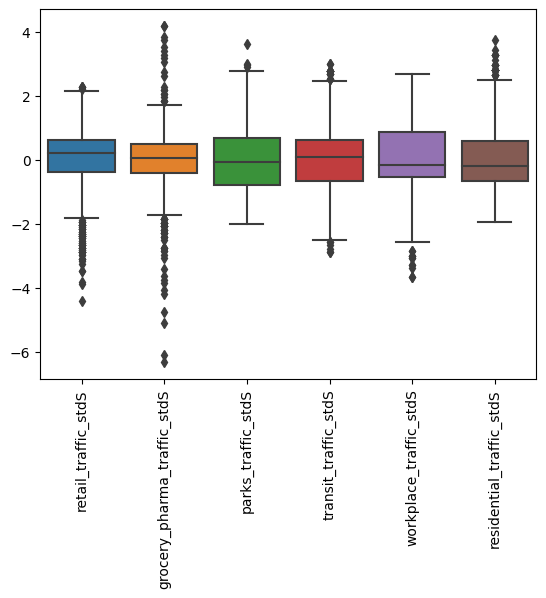

In [41]:
sns.boxplot(data=dff[traffic_colso])
plt.xticks(rotation=90)
plt.show()

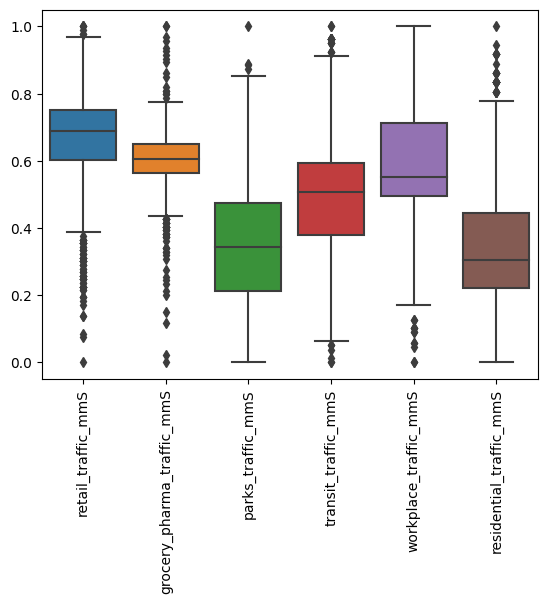

In [42]:
sns.boxplot(data=dff[traffic_colsm])
plt.xticks(rotation=90)
plt.show()

# STD SCALER MEANS are NOT 0, kinda bad

#### PCA with scaled mm, std, and non scaled to show diff is very negligible

In [43]:
from sklearn.decomposition import PCA

# Initialize PCA object
pca = PCA()

# Fit and transform the correlation matrix
pca.fit(dff[traffic_colsm].corr())

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each component
print(explained_variance_ratio.round(3))

[0.899 0.06  0.036 0.004 0.    0.   ]


In [44]:
# Principal components correlation coefficients
loadings = pca.components_
loadings

array([[-0.4388631 , -0.27173936, -0.28142595, -0.47806899, -0.42842934,
         0.49219373],
       [-0.17737766, -0.58435761, -0.54026738,  0.15244138,  0.52802278,
        -0.18201122],
       [-0.30618251, -0.5358651 ,  0.75888929, -0.08815812,  0.0428835 ,
        -0.18324049],
       [ 0.53855337, -0.51425678, -0.07573307,  0.34319899, -0.56738187,
        -0.00755006],
       [-0.55166388,  0.13257483,  0.01880799,  0.77986812, -0.17717713,
         0.19532313],
       [ 0.29633738, -0.1244845 ,  0.21658349,  0.12024968,  0.42718536,
         0.80798023]])

In [45]:
# Number of features before PCA
n_features = pca.n_features_
n_features

6

In [46]:
# Feature names before PCA
feature_names = traffic_colsm
 
# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6
feature_names,,,,,,
retail_traffic_mmS,-0.438863,-0.177378,-0.306183,0.538553,-0.551664,0.296337
grocery_pharma_traffic_mmS,-0.271739,-0.584358,-0.535865,-0.514257,0.132575,-0.124484
parks_traffic_mmS,-0.281426,-0.540267,0.758889,-0.075733,0.018808,0.216583
transit_traffic_mmS,-0.478069,0.152441,-0.088158,0.343199,0.779868,0.120250
workplace_traffic_mmS,-0.428429,0.528023,0.042884,-0.567382,-0.177177,0.427185
residential_traffic_mmS,0.492194,-0.182011,-0.183240,-0.007550,0.195323,0.807980


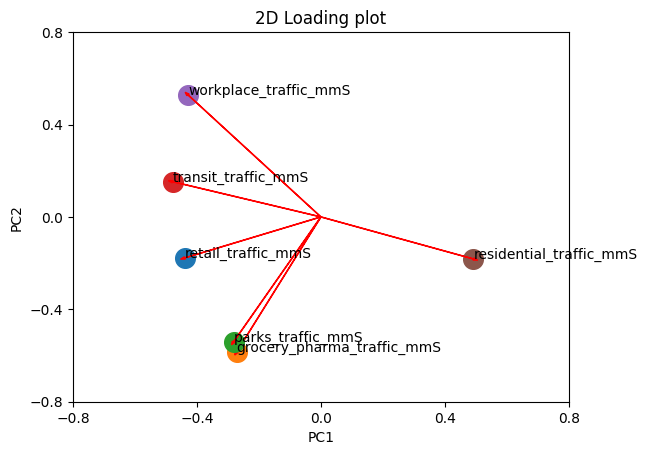

In [47]:
import numpy as np
# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]
 
# Plot the loadings on a scatterplot
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)
 
# Define the axes
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
# Show plot
plt.title('2D Loading plot')
plt.show()

In [48]:
# without scaled data
from sklearn.decomposition import PCA

# Initialize PCA object
pca = PCA()

# Fit and transform the correlation matrix
pca.fit(dff[traffic_cols].corr())

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each component
print(explained_variance_ratio.round(3))

[0.899 0.06  0.036 0.004 0.    0.   ]


In [50]:
from sklearn.decomposition import PCA

# Initialize PCA object
pca = PCA()

# Fit and transform the correlation matrix
pca.fit(dff[traffic_colso].corr())

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each component
print(explained_variance_ratio.round(3))

[0.899 0.06  0.036 0.004 0.    0.   ]


In [51]:
0.899+0.06

0.9590000000000001

## the first principal component captures 90% of cvariance, 2nd- 6%, 3rd- 3.5%, 4th- .5% 5th and 6th 0%

## the desired average is 95%. So we can retain 2 Principal components of traffic index

In [52]:
# Initialize PCA object with 2 components
pca = PCA(n_components=2)

In [53]:
traffic_colso

['retail_traffic_stdS',
 'grocery_pharma_traffic_stdS',
 'parks_traffic_stdS',
 'transit_traffic_stdS',
 'workplace_traffic_stdS',
 'residential_traffic_stdS']

In [54]:
r= ['retail_traffic_stdS',
 'grocery_pharma_traffic_stdS',
 'parks_traffic_stdS',
 'transit_traffic_stdS',
 'workplace_traffic_stdS',
 'residential_traffic_stdS', 'date']

In [56]:
reduced_data= pca.fit_transform(dff[r].set_index('date'))
reduced_data

array([[-3.40010791,  1.80702792],
       [-3.85566283,  1.58913451],
       [-1.38900396, -0.72594656],
       ...,
       [-0.42609573,  0.95353794],
       [-1.00689195,  0.45876443],
       [-2.59253372,  0.77737711]])

In [57]:
df_reduced = pd.DataFrame(reduced_data, columns=["traffic_stdS_PC1", "traffic_stdS_PC2"])
df_reduced

,traffic_stdS_PC1,traffic_stdS_PC2
0,-3.400108,1.807028
1,-3.855663,1.589135
2,-1.389004,-0.725947
3,-2.612910,1.388724
4,-3.162495,1.072996
...,...,...
969,-0.924440,0.360597
970,-1.169479,0.268938
971,-0.426096,0.953538
972,-1.006892,0.458764


In [58]:
df= pd.concat([dff, df_reduced], axis=1)
df

,date,retail_traffic,grocery_pharma_traffic,parks_traffic,transit_traffic,workplace_traffic,residential_traffic,retail_traffic_stdS,grocery_pharma_traffic_stdS,parks_traffic_stdS,...,workplace_traffic_stdS,residential_traffic_stdS,retail_traffic_mmS,grocery_pharma_traffic_mmS,parks_traffic_mmS,transit_traffic_mmS,workplace_traffic_mmS,residential_traffic_mmS,traffic_stdS_PC1,traffic_stdS_PC2
0,2020-02-15,3.0,-4.0,-2.0,-4.0,1.0,0.0,1.776114,0.269385,-0.575480,...,2.319645,-1.302199,0.924731,0.627660,0.254098,0.911392,0.942529,0.111111,-3.400108,1.807028
1,2020-02-16,7.0,-3.0,13.0,0.0,0.0,-1.0,2.063336,0.381037,-0.230744,...,2.246652,-1.460228,0.967742,0.638298,0.315574,0.962025,0.931034,0.083333,-3.855663,1.589135
2,2020-02-17,7.0,-2.0,23.0,-22.0,-37.0,9.0,2.063336,0.492688,-0.000920,...,-0.454067,0.120063,0.967742,0.648936,0.356557,0.683544,0.505747,0.361111,-1.389004,-0.725947
3,2020-02-18,-2.0,-5.0,-4.0,-5.0,-10.0,3.0,1.417087,0.157734,-0.621445,...,1.516728,-0.828112,0.870968,0.617021,0.245902,0.898734,0.816092,0.194444,-2.612910,1.388724
4,2020-02-19,3.0,-2.0,11.0,-3.0,-9.0,2.0,1.776114,0.492688,-0.276709,...,1.589721,-0.986141,0.924731,0.648936,0.307377,0.924051,0.827586,0.166667,-3.162495,1.072996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,2022-10-11,-18.0,-7.0,29.0,-26.0,-28.0,4.0,0.268201,-0.065569,0.136974,...,0.202865,-0.670083,0.698925,0.595745,0.381148,0.632911,0.609195,0.222222,-0.924440,0.360597
970,2022-10-12,-16.0,-5.0,31.0,-25.0,-26.0,4.0,0.411812,0.157734,0.182939,...,0.348850,-0.670083,0.720430,0.617021,0.389344,0.645570,0.632184,0.222222,-1.169479,0.268938
971,2022-10-13,-20.0,-10.0,-5.0,-28.0,-26.0,5.0,0.124590,-0.400524,-0.644428,...,0.348850,-0.512053,0.677419,0.563830,0.241803,0.607595,0.632184,0.250000,-0.426096,0.953538
972,2022-10-14,-16.0,-6.0,18.0,-26.0,-26.0,4.0,0.411812,0.046082,-0.115832,...,0.348850,-0.670083,0.720430,0.606383,0.336066,0.632911,0.632184,0.222222,-1.006892,0.458764


In [59]:
df.columns

Index(['date', 'retail_traffic', 'grocery_pharma_traffic', 'parks_traffic',
       'transit_traffic', 'workplace_traffic', 'residential_traffic',
       'retail_traffic_stdS', 'grocery_pharma_traffic_stdS',
       'parks_traffic_stdS', 'transit_traffic_stdS', 'workplace_traffic_stdS',
       'residential_traffic_stdS', 'retail_traffic_mmS',
       'grocery_pharma_traffic_mmS', 'parks_traffic_mmS',
       'transit_traffic_mmS', 'workplace_traffic_mmS',
       'residential_traffic_mmS', 'traffic_stdS_PC1', 'traffic_stdS_PC2'],
      dtype='object')

In [60]:
loadings = pca.components_[:2]
# create a new DataFrame with the factor loadings
df_loadings = pd.DataFrame(loadings.T, columns=["traffic_stdS_PC1", "traffic_stdS_PC2"], index=['retail_traffic_stdS', 'grocery_pharma_traffic_stdS',
       'parks_traffic_stdS', 'transit_traffic_stdS', 'workplace_traffic_stdS',
       'residential_traffic_stdS',])

# view the factor loadings
df_loadings

,traffic_stdS_PC1,traffic_stdS_PC2
retail_traffic_stdS,-0.452596,-0.164105
grocery_pharma_traffic_stdS,-0.327847,-0.623216
parks_traffic_stdS,-0.305096,-0.445335
transit_traffic_stdS,-0.469901,0.172823
workplace_traffic_stdS,-0.397162,0.539330
residential_traffic_stdS,0.464807,-0.256132


In [61]:
df

,date,retail_traffic,grocery_pharma_traffic,parks_traffic,transit_traffic,workplace_traffic,residential_traffic,retail_traffic_stdS,grocery_pharma_traffic_stdS,parks_traffic_stdS,...,workplace_traffic_stdS,residential_traffic_stdS,retail_traffic_mmS,grocery_pharma_traffic_mmS,parks_traffic_mmS,transit_traffic_mmS,workplace_traffic_mmS,residential_traffic_mmS,traffic_stdS_PC1,traffic_stdS_PC2
0,2020-02-15,3.0,-4.0,-2.0,-4.0,1.0,0.0,1.776114,0.269385,-0.575480,...,2.319645,-1.302199,0.924731,0.627660,0.254098,0.911392,0.942529,0.111111,-3.400108,1.807028
1,2020-02-16,7.0,-3.0,13.0,0.0,0.0,-1.0,2.063336,0.381037,-0.230744,...,2.246652,-1.460228,0.967742,0.638298,0.315574,0.962025,0.931034,0.083333,-3.855663,1.589135
2,2020-02-17,7.0,-2.0,23.0,-22.0,-37.0,9.0,2.063336,0.492688,-0.000920,...,-0.454067,0.120063,0.967742,0.648936,0.356557,0.683544,0.505747,0.361111,-1.389004,-0.725947
3,2020-02-18,-2.0,-5.0,-4.0,-5.0,-10.0,3.0,1.417087,0.157734,-0.621445,...,1.516728,-0.828112,0.870968,0.617021,0.245902,0.898734,0.816092,0.194444,-2.612910,1.388724
4,2020-02-19,3.0,-2.0,11.0,-3.0,-9.0,2.0,1.776114,0.492688,-0.276709,...,1.589721,-0.986141,0.924731,0.648936,0.307377,0.924051,0.827586,0.166667,-3.162495,1.072996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,2022-10-11,-18.0,-7.0,29.0,-26.0,-28.0,4.0,0.268201,-0.065569,0.136974,...,0.202865,-0.670083,0.698925,0.595745,0.381148,0.632911,0.609195,0.222222,-0.924440,0.360597
970,2022-10-12,-16.0,-5.0,31.0,-25.0,-26.0,4.0,0.411812,0.157734,0.182939,...,0.348850,-0.670083,0.720430,0.617021,0.389344,0.645570,0.632184,0.222222,-1.169479,0.268938
971,2022-10-13,-20.0,-10.0,-5.0,-28.0,-26.0,5.0,0.124590,-0.400524,-0.644428,...,0.348850,-0.512053,0.677419,0.563830,0.241803,0.607595,0.632184,0.250000,-0.426096,0.953538
972,2022-10-14,-16.0,-6.0,18.0,-26.0,-26.0,4.0,0.411812,0.046082,-0.115832,...,0.348850,-0.670083,0.720430,0.606383,0.336066,0.632911,0.632184,0.222222,-1.006892,0.458764


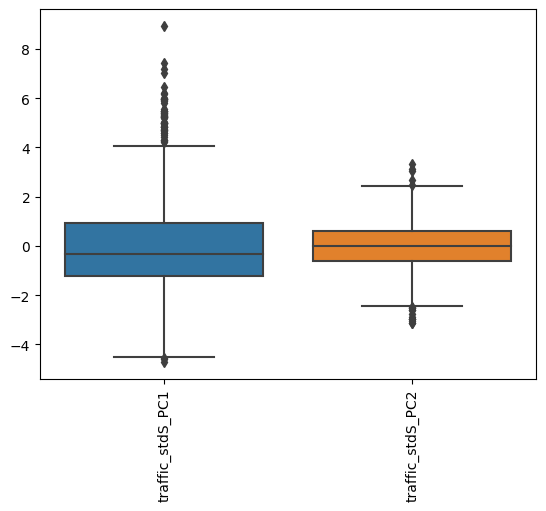

In [62]:
sns.boxplot(data=df[["traffic_stdS_PC1", "traffic_stdS_PC2"]])
plt.xticks(rotation=90)
plt.show()

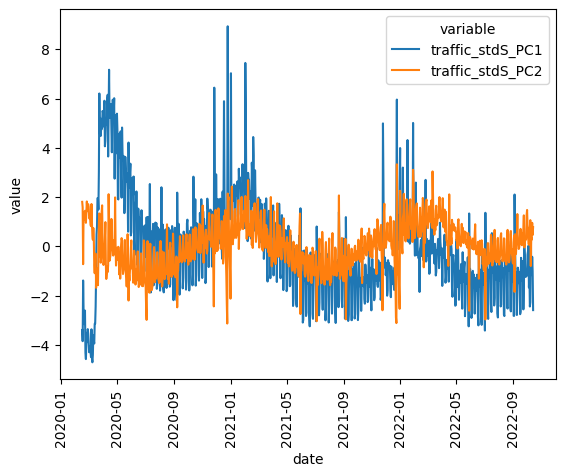

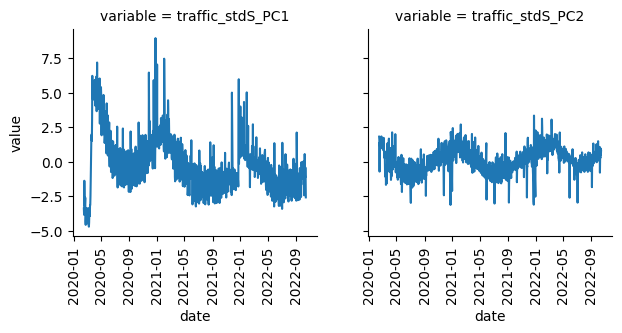

In [64]:
# convert dataframe from wide format to long format
df_melt = pd.melt(df[['date',"traffic_stdS_PC1", "traffic_stdS_PC2"]], id_vars=['date'], var_name='variable', value_name='value')

# plot all the variables on the same chart
sns.lineplot(x='date', y='value', hue='variable', data=df_melt)
# display the chart
plt.xticks(rotation=90)
plt.show()

g = sns.FacetGrid(data=df_melt, col="variable", col_wrap=6)
g.map(sns.lineplot, "date", "value")
g.set_xticklabels(rotation=90)
plt.show()

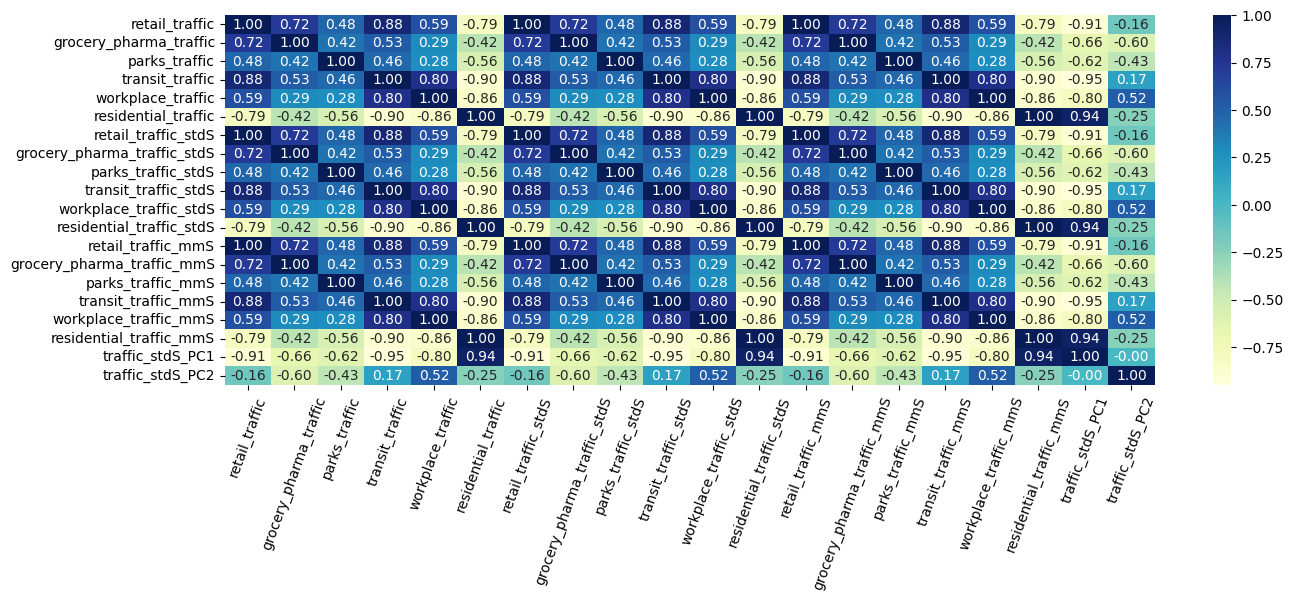

In [70]:
plt.figure().set_figwidth(15)
hm= sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, fmt='.2f')
hm.set_xticklabels(hm.get_xticklabels(), rotation=70)
plt.show()

In [71]:
df.to_csv('../data/clean_traffic_PCA.csv', index=False)